# Работа с библиотекой requests, http запросы

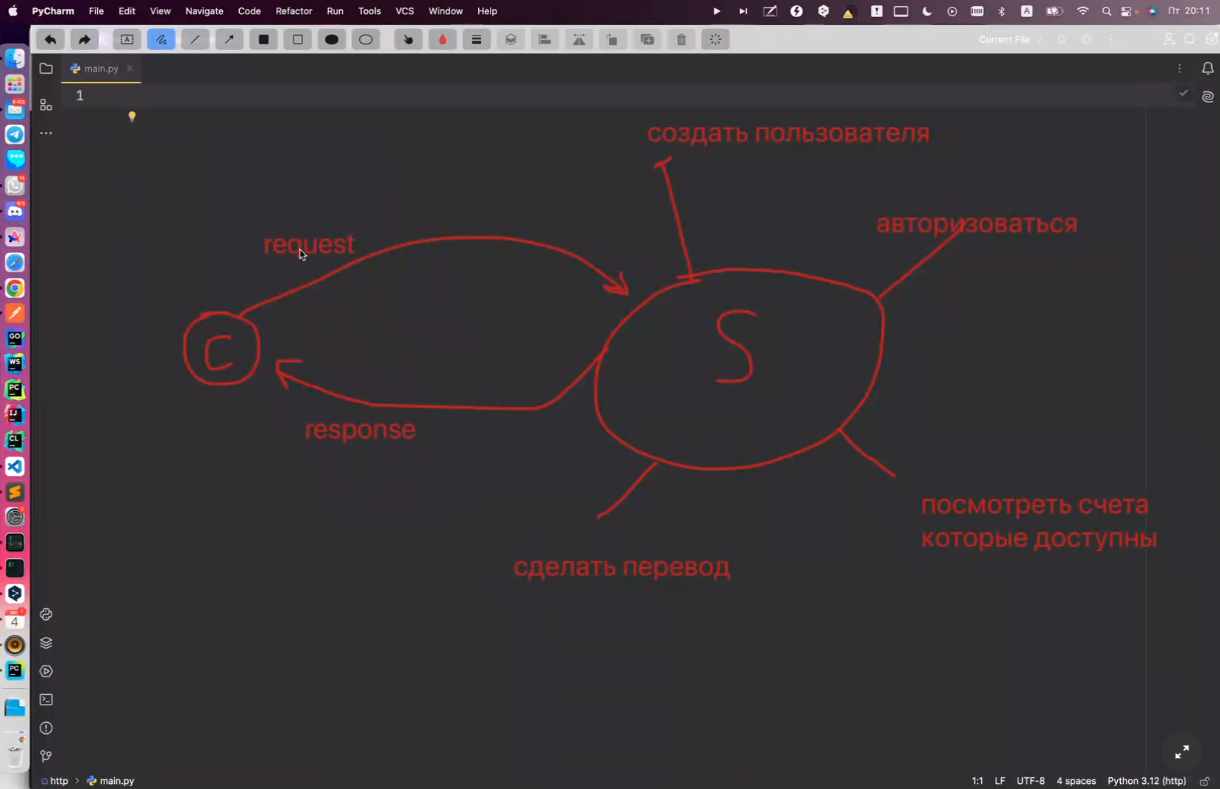

Перед тем как сделать запрос, нужно знать следующее:
* адрес ресурса, к которому хотим обратиться (URL (uniform resource locator), URI (uniform resource identificator)). Просто URL адрес
* метод, который используем 
* какие данные передавать и в каком виде их передавать.

### URL
   
https/http - это протоколы (s - secured)
www.dns-shop.ru - это сервер (хост, домен)
/search/ - путь (path)
?q=1234&category=17a6 - это параметры (query string, params)


### Методы

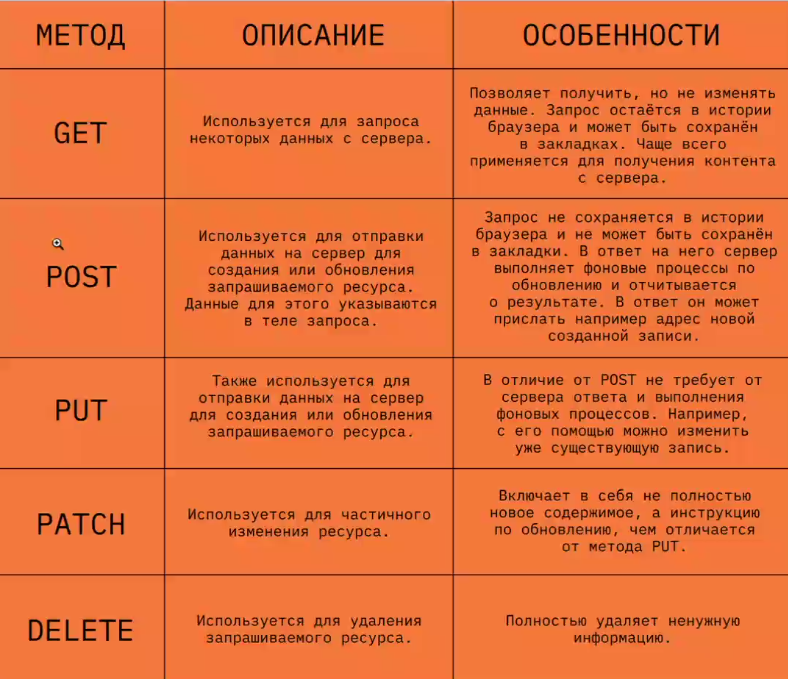

### Как передаем данные?

* query string (params)
* Заголовки (headers)
* Тело запроса (body)

### Как выглядит запрос?

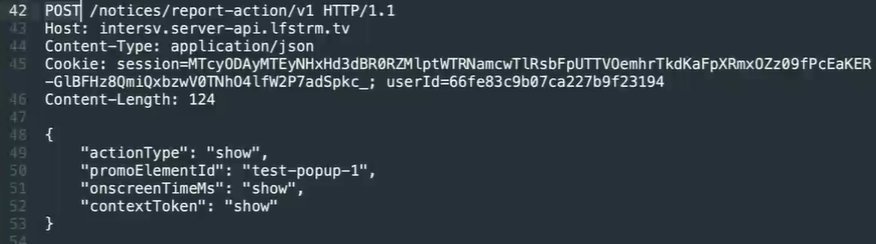

### Как выглядит ответ?

<код ответа> <текстовая расшифровка> <протокол>
```raw
200 OK HTTP/1.1
Server: nginx
Content-Type: application/json
Content-Length: 120

{
    "status": 200,
    "msg": "OK"
}
```
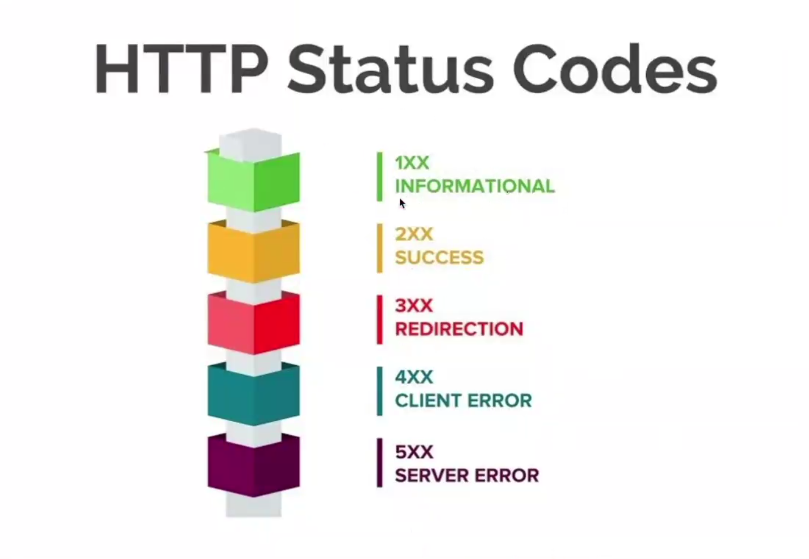

### Пишем собственный API для банка

host: mybank.com

1) Регистрация
```markdown
POST /registration
host: mybank.com
Content-Type: application/json
Content-Length: 120

{
    "login": "timur",
    "password": "12345"
}


200 OK HTTP/1.1
Content-Type: application/json
Content-Length: 120

{
    "registrated": "success",
    "id": "12ed231r31f3"
}
```

2. Авторизация
```markdown
POST /login
host: mybank.com
Content-Type: application/json
Content-Length: 120

{
    "login": "timur",
    "password": "12345"
}


200 OK HTTP/1.1
Content-Type: application/json
Content-Length: 120

{
    "msg": "authorizated"
}
```

3. Запрос счетов пользователя
```markdown
GET /accounts
host: mybank.com
Cookie: g444235445432hj5jkhjkh5jk2h35jkh23j


200 OK HTTP/1.1
Content-Type: application/json
Content-Length: 120

{
    {
        "id": "ug34hu324",
        "name": "зарплатный",
        "amount": 10000,
    }
}
```

4. Получить информацию о конкретном счете
```markdown
GET /accounts/ug34hu324
host: mybank.com
Cookie: g444235445432hj5jkhjkh5jk2h35jkh23j


200 OK HTTP/1.1
Content-Type: application/json
Content-Length: 120

{
    {
        "id": "ug34hu324",
        "name": "зарплатный",
        "amount": 10000,
        "history": [
            {
                "id": "sddsad",
                ...
            }
        ]
    }
}
```

5. Изменить данные счета
```markdown
PUT /accounts/ug34hu324
host: mybank.com
Cookie: g444235445432hj5jkhjkh5jk2h35jkh23j
Content-Type: application/json
Content-Length: 120

{
    "name": "На отдых на Бали",
}



200 OK HTTP/1.1
Content-Type: application/json
Content-Length: 120

{
    {
        "id": "ug34hu324",
        "name": "На отдых на Бали",
        "amount": 10000,
        "history": [
            {
                "id": "sddsad",
                ...
            }
        ]
    }
}
```

JSON - считаются сырыми запросами

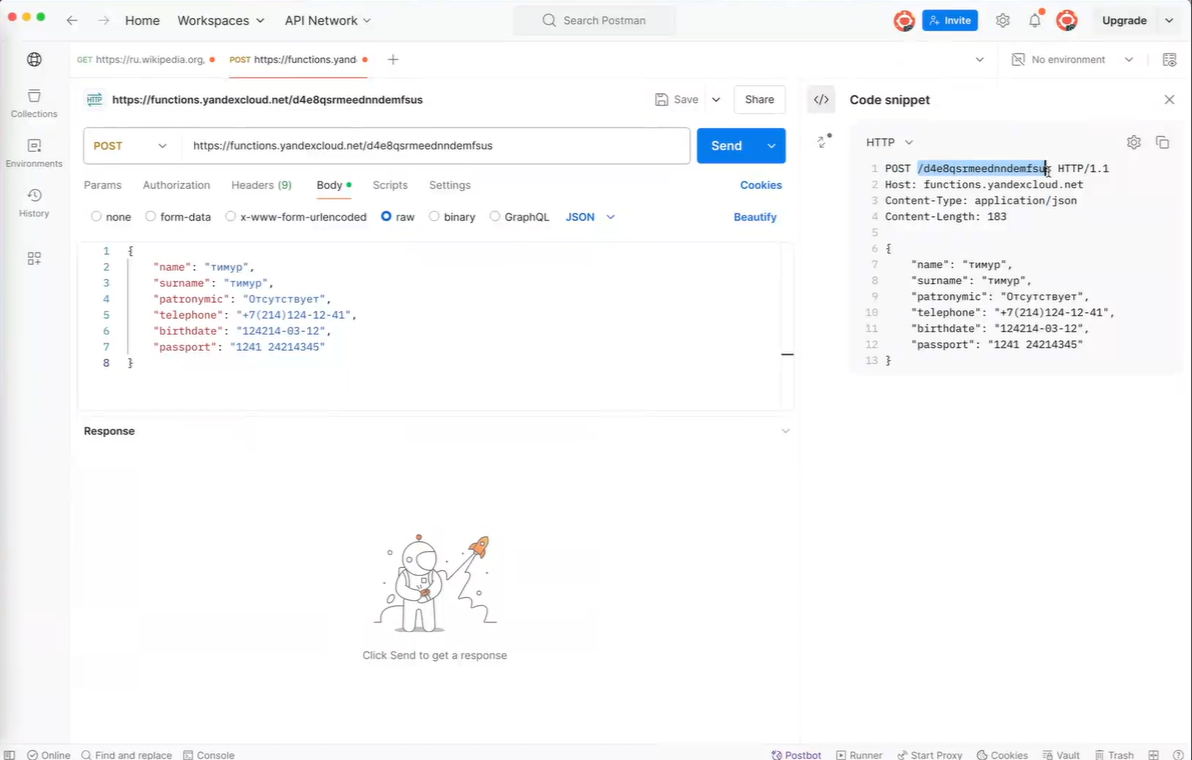

In [1]:
import requests
import json

from pprint import pprint

In [ ]:
# 0. скачиваем страницу сайта

url = 'https://ru.wikipedia.org/wiki/HTTP'
response = requests.get(url)  # методом get мы получаем объект ответа (Response)

print(response, type(response))  # Responce [200] - успех
print(response.status_code)  # у этого объекта есть аттрибуты: статус ответа
print(response.headers)  # технические данные при передаче ответа
print(response.text)  # текстовый ответ, который интерпретируется в соответствии с header-ом Content-Type
print(response.content)  # байтовый массив из содержимого. Обычно будет использоваться при получении картинки и тд

In [ ]:
# 0. заполним анкету

url = 'https://functions.yandexcloud.net/d4e8qsrmeednndemfsus'
payload = {
    "name": "тимур",
    "surname": "тимур",
    "patronymic": "Отсутствует",
    "telephone": "+7(214)124-12-41",
    "birthdate": "124214-03-12",
    "passport": "1241 24214345"
}
headers = {
    'Content-Type': 'application/json'
}

response = requests.post(  # отправляем на сервер методом POST данные анкеты.
    url,
    headers=headers,
    data=json.dumps(payload)  # данные мы отправляем в виде текстового словаря, то бишь json.
)
# response = requests.post(
#     url,
#     json=payload  # можно прям напрямую прописать json и тогда в строку переводить не надо, причем Content-Type будет так же излишен
# )
print(response.status_code)  
print(response.text)

### Нужно сходить на сервер наса и узнать информацию о картинке дня. Скачать на компьютер картинку дня. На яндекс-диске создать папку для хранения картинок. Загрузить картинку в папку на яндекс-диск

In [ ]:
# 1 Нужно сходить на сервер наса и узнать информацию о картинке дня
url = 'https://api.nasa.gov/planetary/apod'
params = {
    'api_key': 'xJShRlgIycmholreQyElmr64zyTjFwM51UQf2Ee4',
}

response = requests.get(url, params=params)  # с помощью GET запроса получаем объект ответа.
print(response.json())
image_link = response.json()['url']
filename = image_link.split('/')[-1]  # получаем имя из URL
pathfile = f'images/{filename}'  # создаем маршрут на основе filename


In [5]:
# 2. скачать на компьютер картинку дня
response = requests.get(image_link)  # по маршруту получаем картинку
with open(pathfile, 'wb') as f:  # открываем файл на запись, бинарно
    f.write(response.content)  # записываем поток байтов из объекта ответа
    

In [9]:
# 3. на яндекс-диске создать папку для хранения картинок
url = 'https://cloud-api.yandex.net/v1/disk/resources'
params = {
    'path': '/Image'  # в параметрах path указываем папку, и она автоматически создается
}
headers = {
    'Authorization': 'OAuth y0_AgAEA7qki-4XAADLWwAAAAETjMneAAArhE2XzepHEJdshpKJb-P6Ay8whQ'  # используем токен OAuth
}

response = requests.put(url, params=params, headers=headers)  # методом PUT создаем папку на яндекс диске



In [ ]:
# 4 загрузить картинку в папку на яндекс-диск
url = 'https://cloud-api.yandex.net/v1/disk/resources/upload'
params = {
    'path': f'/Image/{filename}'
}

response = requests.get(url, params=params, headers=headers)
print(response.json())
upload_link = response.json()['href']

with open(pathfile, 'rb') as f:
    response = requests.put(upload_link, files={'file': f})
    print(response.status_code)

## Домашнее задание.

### Задание 1.

In [ ]:
import requests


def get_the_smartest_superhero() -> str:
    superheroes_dict = {
        'Hulk': 0, 
        'Captain America': 0, 
        'Thanos': 0
        }
    url = 'https://akabab.github.io/superhero-api/api/all.json'
    cnt = 0
    response = requests.get(url)
    
    superheroes_stats = response.json()
    for suspect in superheroes_stats:
        if suspect['name'] in superheroes_dict.keys():
            superheroes_dict[suspect['name']] = suspect['powerstats']['intelligence']
            cnt += 1
        if cnt == 3:
            break
    
    the_smartest_superhero = max(superheroes_dict, key=superheroes_dict.get)
    return the_smartest_superhero

if __name__ == '__main__':
    print(get_the_smartest_superhero())


### Задание 2.

In [ ]:
import requests

def get_the_smartest_superhero(superheros):
    the_smartest_superhero = ''
    highest_intelligence = -1e6
    for superhero_id in superheros:
        url = f'https://akabab.github.io/superhero-api/api/id/{superhero_id}.json'
        response = requests.get(url)
        hero = response.json()
        intelligence = hero['powerstats']['intelligence']
        if intelligence > highest_intelligence:
            highest_intelligence = intelligence
            the_smartest_superhero = hero['name']
        if highest_intelligence == 100:
            break

    return the_smartest_superhero

if __name__ == '__main__':
   print(get_the_smartest_superhero([1, 2, 3]))

dict.1.1.20241007T173226Z.7131069845c9a355.cb36eae0057d95b6e9d8f48bfcfd35e4b0efa4be

In [ ]:
url = 'https://dictionary.yandex.net/api/v1/dicservice.json/lookup'
params = {
    'key': 'dict.1.1.20241007T173226Z.7131069845c9a355.cb36eae0057d95b6e9d8f48bfcfd35e4b0efa4be',
    'lang': 'ru-en',
    'text': 'Палец',
}

response = requests.get(url, params=params)
tr_json = response.json()
for definition in tr_json['def']:
    for translation in definition['tr']:
        translate = translation['text']
        break

print(translate)

In [ ]:
uk_cities = [
    'Leeds', 
    'London', 
    'Liverpool', 
    'Manchester', 
    'Oxford', 
    'Edinburgh', 
    'Norwich', 
    'York',
]

def find_uk_city(coordinates: list[tuple]) -> str:
    api_key = '67041e0688bb6429153282yfs5454da'
    url = 'https://geocode.maps.co/reverse'
    for latitude, longitude in coordinates:
        params = {
            'lat': latitude,
            'lon': longitude,
            'api_key': api_key,
        }
        response = requests.get(url, params=params)
        city_name = response.json()['address']['city']
        if city_name in uk_cities:
            return city_name


lst = [
        ('55.7514952', '37.618153095505875'),
        ('52.3727598', '4.8936041'),
        ('53.4071991', '-2.99168')
    ]
find_uk_city(lst)


In [ ]:
response = requests.get('https://netology.ru/')

In [143]:
from datetime import datetime


def get_city_coordinates(name: str, country: str) -> tuple[float]:
    url_coordinates = 'https://geocode.maps.co/search'
    api_key_coordinates = '67041e0688bb6429153282yfs5454da'
    params_coords = {
        'q': name,
        'api_key': api_key_coordinates,
    }

    target_address = None
    resp_coords = requests.get(url_coordinates, params=params_coords)
    addresses_list = resp_coords.json()
    for address in addresses_list:
        address_parts = address['display_name'].split(', ')
        curr_city_name, curr_country_name = address_parts[0], address_parts[-1]
        if curr_city_name == name and curr_country_name == country:
            target_address = address
            break

    longitude, latitude = target_address['lon'], target_address['lat']
    return latitude, longitude

def create_weather_file(lat: float, lon: float, name: str, country: str, name_of_folder: str) -> None:
    url_weather = 'https://api.openweathermap.org/data/2.5/weather'
    api_key_weather = 'a37a6bc48f87226456ae4dd44f16075a'
    params_weather = {
        'lat': lat,
        'lon': lon,
        'appid': api_key_weather,
    }
    resp_weather = requests.get(url_weather, params=params_weather).json()
    main_weather = resp_weather['weather'][0]['main']
    temperature = resp_weather['main']['temp'] - 273  # Kelvin
    feels_like_temp = resp_weather['main']['feels_like'] - 273  # Kelvin
    pressure = resp_weather['main']['pressure']
    humidity = resp_weather['main']['humidity']
    wind_speed = resp_weather['wind']['speed']
    date, time = str(datetime.fromtimestamp(resp_weather['dt'])).split()
    time = time.replace(':', '-')
    with open(f'weather/{date}_{time}.txt', 'w') as f:
        f.write(f'Time: {time}\nDate: {date}\nCity: {name}\nCountry\
: {country}\nMain weather: {main_weather}\nTemperature (Celsius):\
 {temperature:.2f}\nFeels like: {feels_like_temp:.2f}\nPressure:\
 {pressure}\nHumidity: {humidity}\nWind speed: {wind_speed}')
    
    url_upload = 'https://cloud-api.yandex.net/v1/disk/resources/upload'
    params_upload = {
        'path': f'{name_of_folder}/{date}_{time}.txt',
        'overwrite': True,
    }
    headers_upload = {
        'Authorization': 'OAuth y0_AgAEA7qki-4XAADLWwAAAAETjMneAAArhE2XzepHEJdshpKJb-P6Ay8whQ'
    }
    resp_upload = requests.get(url_upload, params=params_upload, headers=headers_upload)
    upload_link = resp_upload.json()['href']
    with open(f'weather/{date}_{time}.txt') as f:
        requests.put(upload_link, files={'file': f})

def create_folder(name_of_folder: str) -> None:
    url_create_folder = 'https://cloud-api.yandex.net/v1/disk/resources'
    params_create_folder = {
        'path': f'{name_of_folder}/',
    }
    headers_create_folder = {
        'Authorization': 'OAuth y0_AgAEA7qki-4XAADLWwAAAAETjMneAAArhE2XzepHEJdshpKJb-P6Ay8whQ'
    }
    requests.put(url_create_folder, params=params_create_folder, headers=headers_create_folder)


if __name__ == '__main__':
    city_name = 'Moscow'
    country_name = 'Russia' 
    name_of_folder = 'Weather'
    city_lat, city_lon = get_city_coordinates(city_name, country_name)
    create_folder(name_of_folder)
    create_weather_file(city_lat, city_lon, city_name, country_name, name_of_folder)

# API

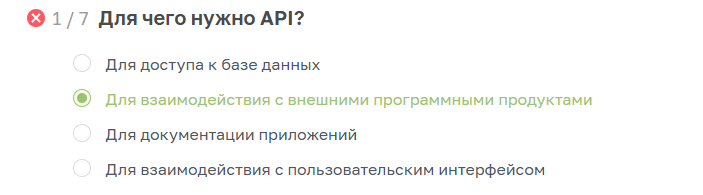

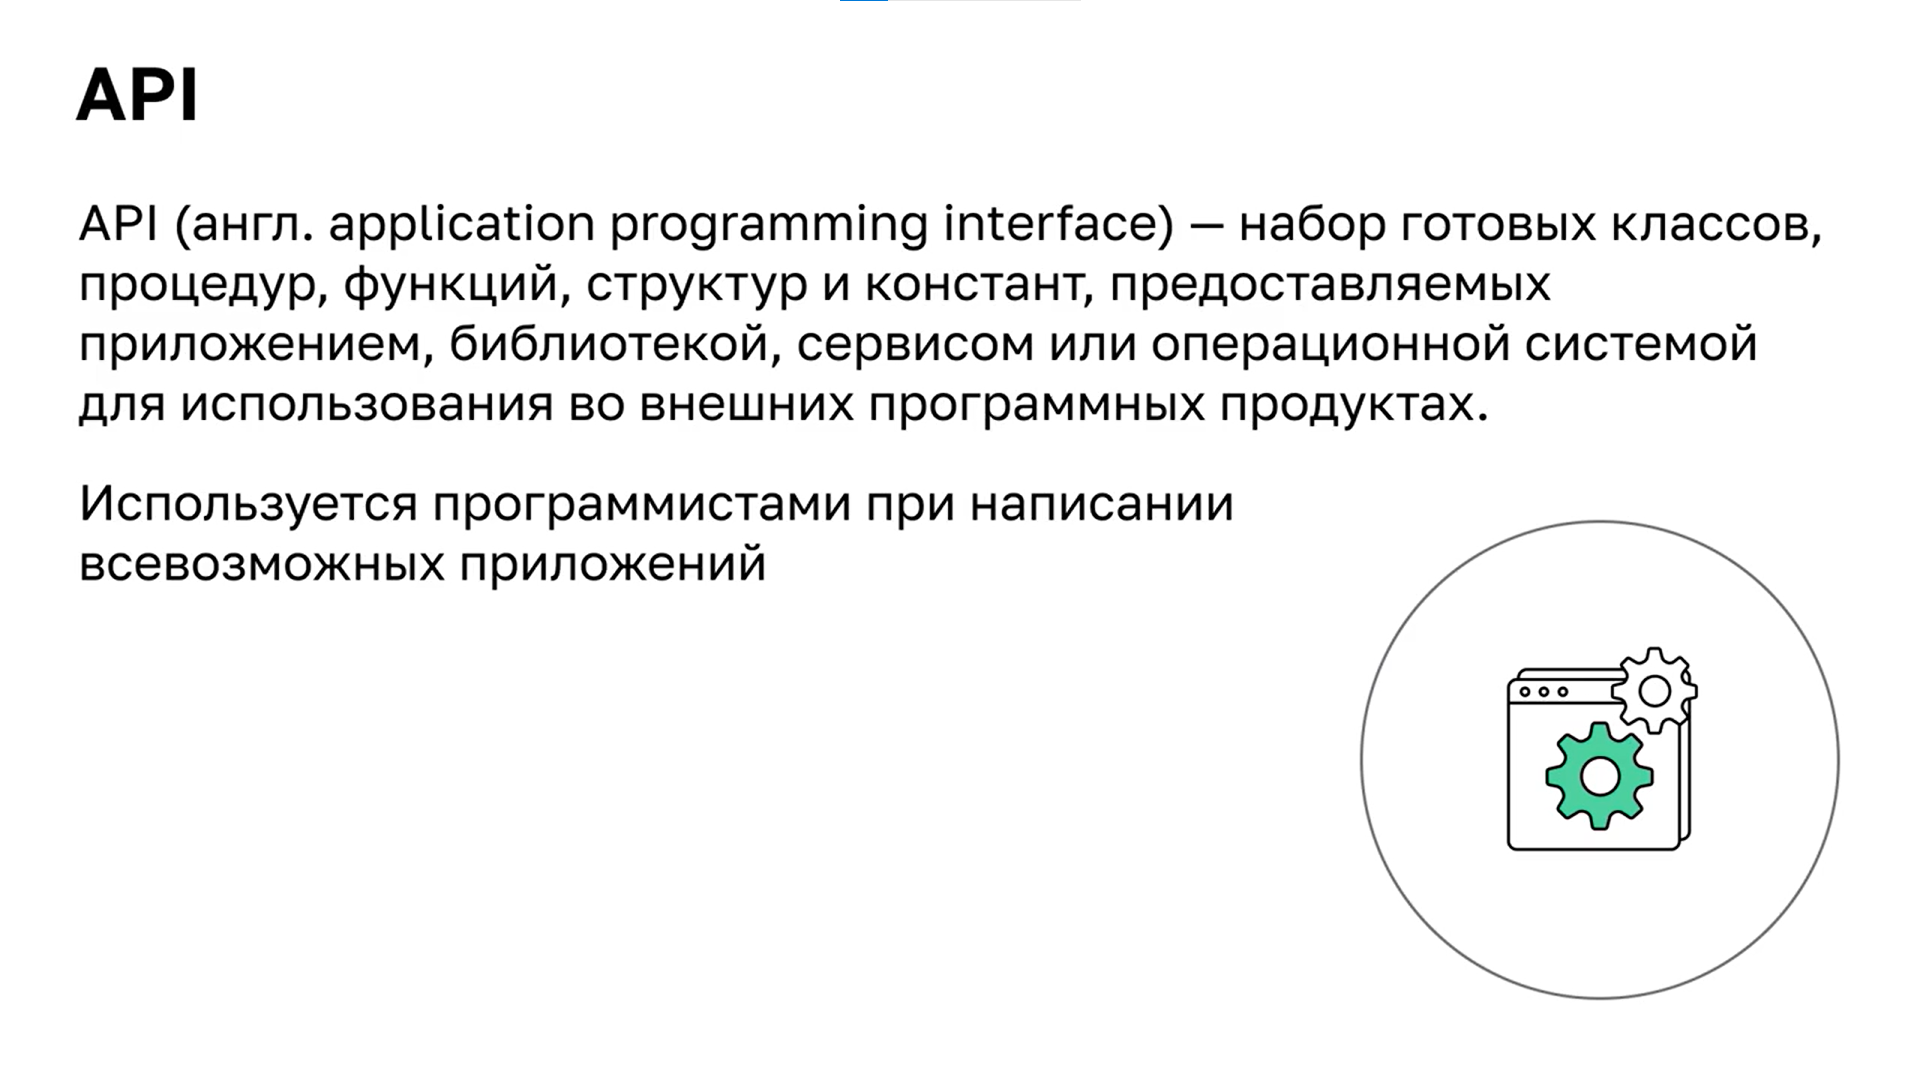

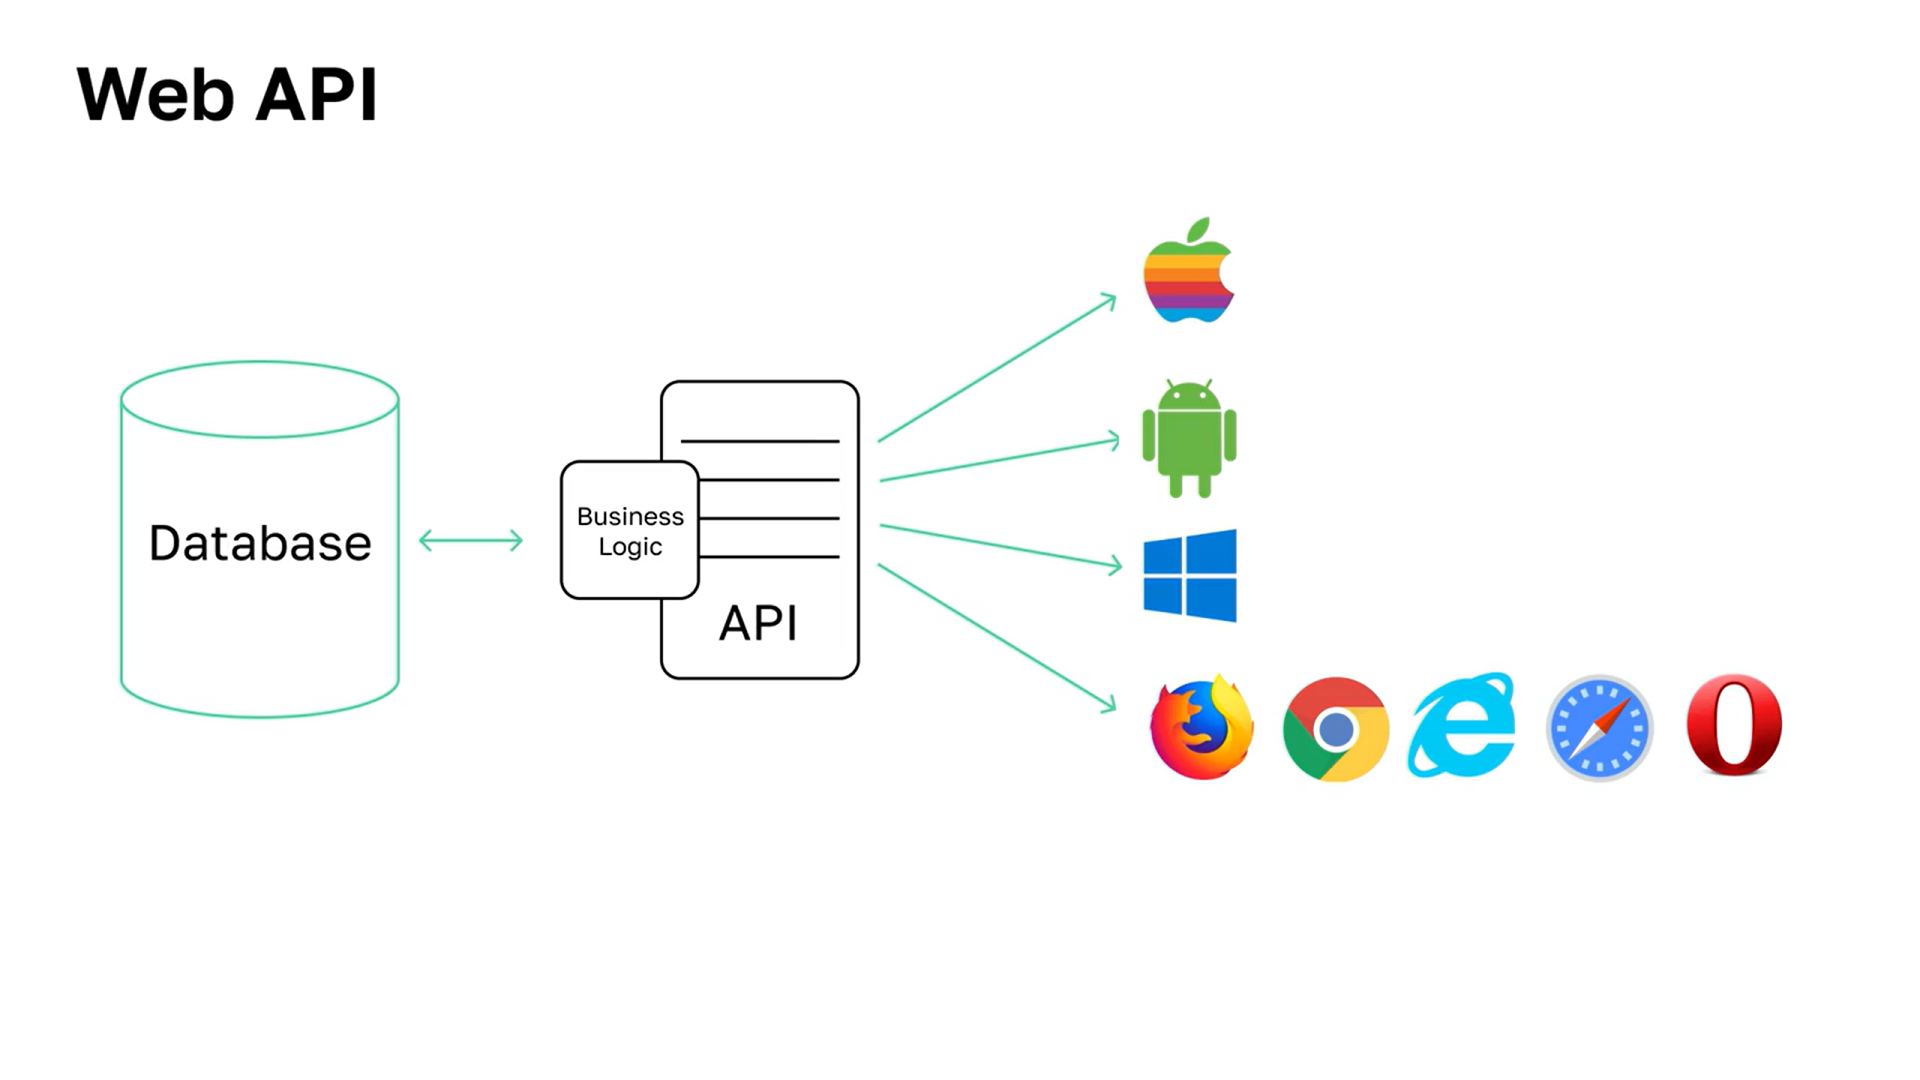

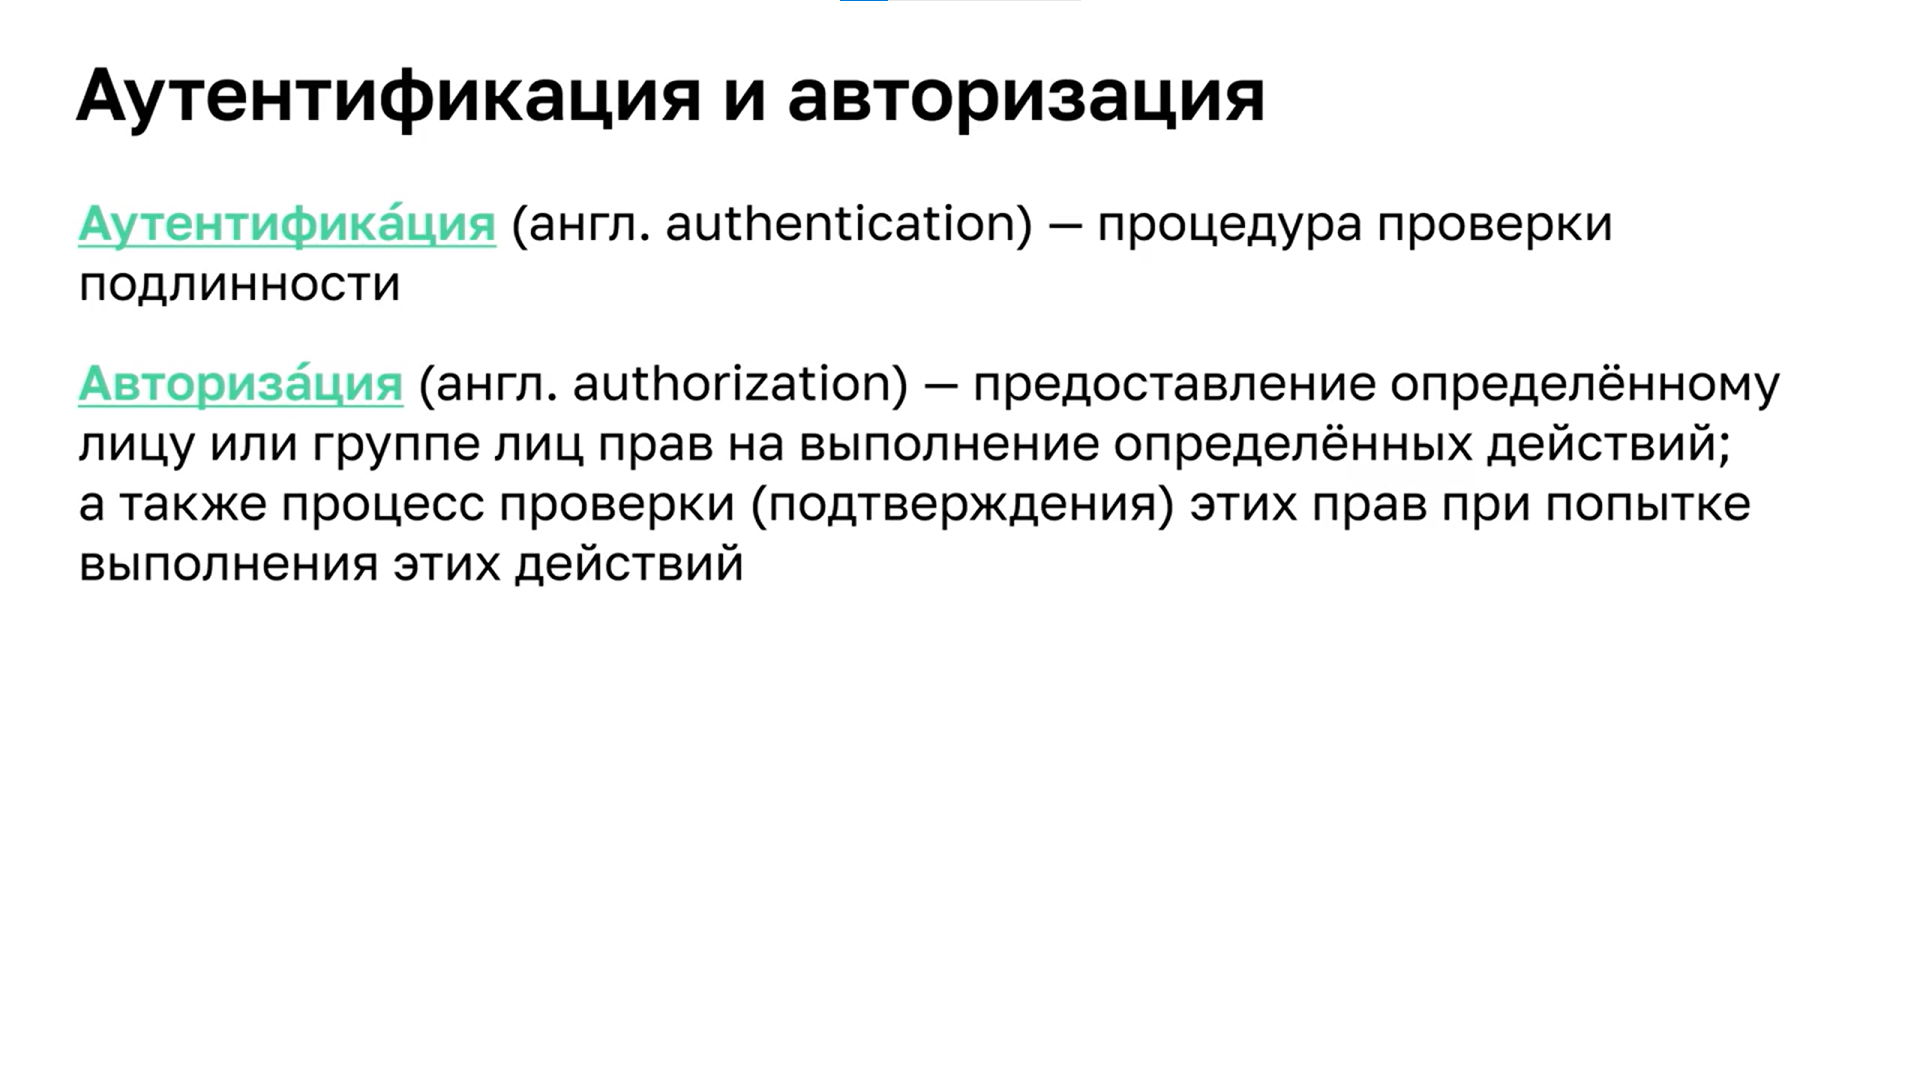

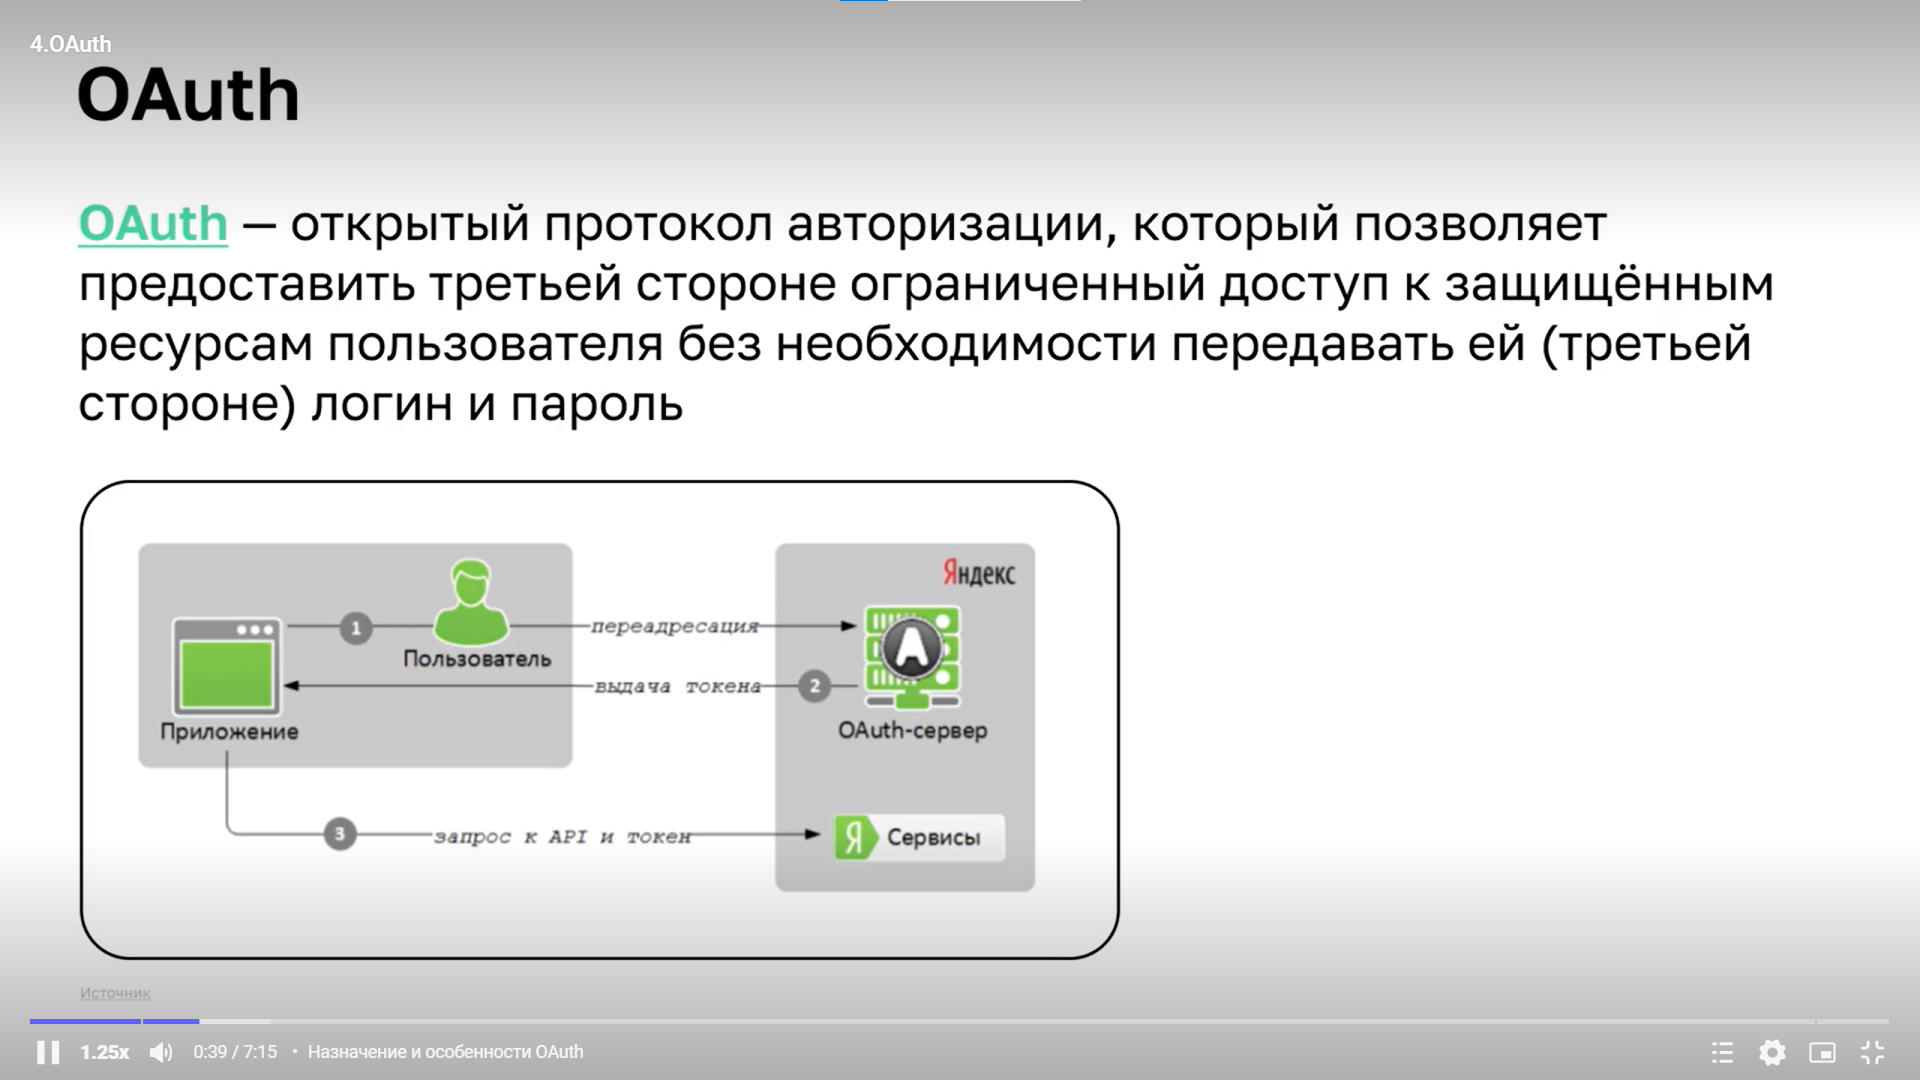

In [2]:
import requests


class VK:

    def __init__(self, access_token, user_id, version='5.199'):
        self.token = access_token
        self.id = user_id
        self.version = version
        self.params = {'access_token': self.token, 'v': self.version}

    def users_info(self):
        url = 'https://api.vk.com/method/users.get'
        params = {'user_ids': self.id}
        response = requests.get(url, params={**self.params, **params})
        return response.json()
    

access_token = 'vk1.a.9zWMFIVWmzbzGyCVJLT9VW8wDh3C95sZx1cIVSXAZ6qwv7UyMPmgviYPDwUTgF51pi3IMcZKjuY5Dw1u97WpcE9KZ30y4_uU1-d4tfzgPBXWP95a6WkFYMhH95pXek0IWN2QzqcNW-dc6NUhQ6FAagnd91344za1hYU02WK6N1p-6wdQQEYozZxxqgAtAah8'
user_id = '432636773'
vk = VK(access_token, user_id)

print(vk.users_info())

{'response': [{'id': 432636773, 'first_name': 'Надежда', 'last_name': 'Берегова', 'can_access_closed': True, 'is_closed': False}]}


### На самом деле принцип работы с API должен сильно напоминать нам работу с классами в Python. Они тоже имеют методы, которые выполняют понятные действия, абстрогируясь от приципов их выполнения. Реализуем работу с API через классы. То есть API над API

In [7]:
import requests


TOKEN = 'vk1.a.3uTlkm3u0XeBWTv3pEZxH7rkCh6FtYETOeAZFpnkjAa9dpTKOz4oHCixPB1GcZPMi4UZ2ltEbbt3JWycg9r5rJE2fWKNucwBPO3h_2O-1zQeNs59Swxea53BsAMzlnG5Hj02nPZn7olVzCSCoLL3tKVSQA2aUixmI5h-Dxuf-0NPmezuIKadWju8w9wgNO9X-_ckpiTqgFjQm_2JYzC6nA'

class VKAPIClient:
    API_BASE_URL = 'https://api.vk.com/method'
    
    def __init__(self, token, user_id):
        self.token = token
        self.user_id = user_id

    def get_common_params(self):
        return {
            'access_token': self.token,
            'v': '5.199',
        }

    def get_status(self):
        params = {
            'access_token': self.token,
            'v': '5.199',
            'user_id': self.user_id,
        }
        response = requests.get('https://api.vk.com/method/status.get', params=params)
        return response.json()


if __name__ == '__main__':
    vk_client = VKAPIClient(TOKEN, 272774264)
    print(vk_client.get_status())

{'response': {'text': 'Hello, World!'}}


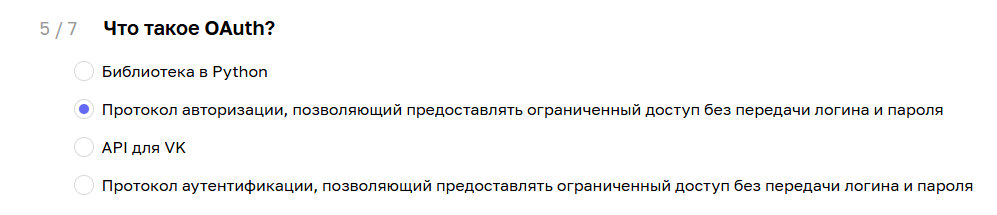

```markdown
https://teletype.in/@pythontalk/requirements
https://docs-python.ru/standart-library/modul-venv-python/
https://teletype.in/@pythontalk/tqdm_progressbars
https://habr.com/ru/articles/485236/
https://habr.com/ru/companies/wunderfund/articles/683880/
```